# Summary Evaluation over different experimental hyperparameter combinaitons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove waringns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load csv
df = pd.read_csv('/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/rf/results_per_parameter.csv')
df.head()

,parameter_combination_string,hyperparameter_different,hyperparameter_same,hyperparameter_different_rel,val_train_descriptives_ks_statistic_mean_stratified,val_train_descriptives_ks_statistic_sd_stratified,val_train_descriptives_ks_statistic_mean_unstratified,val_train_descriptives_ks_statistic_sd_unstratified,val_train_descriptives_ks_statistic_mean_diff,val_train_descriptives_p_value_mean_stratified,...,RandomSearch_Mean_Val_MSE_diff,error_estimatorerror_estimate_mean_stratified,error_estimatorerror_estimate_sd_stratified,error_estimatorerror_estimate_mean_unstratified,error_estimatorerror_estimate_sd_unstratified,error_estimatorerror_estimate_mean_diff,num_unique_stratified,counts_stratified,num_unique_unstratified,counts_unstratifed
0,rf_identity_200_5_0,66,54,0.550000,0.025000,5.574390e-17,0.147635,0.023009,-0.122635,1.000000,...,-0.132207,-0.275194,7.323039,-0.341298,7.391121,0.066104,[0 1 2 3 4 5],[ 1 19 47 26 19 8],[0 1 2 3 4],[16 40 35 20 9]
1,rf_identity_200_5_3,103,17,0.858333,0.025000,5.574390e-17,0.143542,0.021807,-0.118542,1.000000,...,-0.162602,-0.376737,16.444663,-0.458038,16.532928,0.081301,[0 1 2 3 4 5],[13 36 35 18 11 7],[0 1 2 3 4 5],[10 32 36 19 15 8]
2,rf_identity_200_10_0,84,36,0.700000,0.047115,1.690276e-03,0.148542,0.025529,-0.101427,0.999997,...,-0.146467,-0.201014,7.274638,-0.274248,7.349986,0.073234,[0 1 2 3 4 5],[ 1 11 42 34 22 10],[0 1 2 3 4],[13 36 41 18 12]
3,rf_identity_200_10_3,104,16,0.866667,0.047031,1.715464e-03,0.150521,0.020387,-0.103490,0.999997,...,-0.305371,-0.040919,16.321397,-0.193605,16.476124,0.152685,[0 1 2 3 4 5],[11 33 37 18 14 7],[0 1 2 3 4 5],[12 41 31 13 13 10]
4,rf_identity_1000_5_0,83,37,0.691667,0.005000,3.483994e-18,0.067702,0.011139,-0.062702,1.000000,...,-0.030150,-0.128450,4.086910,-0.143525,4.101599,0.015075,[0 1 2 3 4],[ 1 67 39 12 1],[0 1 2 3 4 5],[ 1 60 40 17 1 1]


In [3]:
# split parameter_combination_string into separate columns
df['param_model'] = df['parameter_combination_string'].str.split('_').str[0]
df['param_transformation'] = df['parameter_combination_string'].str.split('_').str[1]
df['param_n_train'] = df['parameter_combination_string'].str.split('_').str[2]
df['param_group_size'] = df['parameter_combination_string'].str.split('_').str[3]
df['param_noise'] = df['parameter_combination_string'].str.split('_').str[4]

numeric_columns = ['param_n_train', 'param_group_size', 'param_noise']
df[numeric_columns] = df[numeric_columns].astype(int)

df.head()


,parameter_combination_string,hyperparameter_different,hyperparameter_same,hyperparameter_different_rel,val_train_descriptives_ks_statistic_mean_stratified,val_train_descriptives_ks_statistic_sd_stratified,val_train_descriptives_ks_statistic_mean_unstratified,val_train_descriptives_ks_statistic_sd_unstratified,val_train_descriptives_ks_statistic_mean_diff,val_train_descriptives_p_value_mean_stratified,...,error_estimatorerror_estimate_mean_diff,num_unique_stratified,counts_stratified,num_unique_unstratified,counts_unstratifed,param_model,param_transformation,param_n_train,param_group_size,param_noise
0,rf_identity_200_5_0,66,54,0.550000,0.025000,5.574390e-17,0.147635,0.023009,-0.122635,1.000000,...,0.066104,[0 1 2 3 4 5],[ 1 19 47 26 19 8],[0 1 2 3 4],[16 40 35 20 9],rf,identity,200,5,0
1,rf_identity_200_5_3,103,17,0.858333,0.025000,5.574390e-17,0.143542,0.021807,-0.118542,1.000000,...,0.081301,[0 1 2 3 4 5],[13 36 35 18 11 7],[0 1 2 3 4 5],[10 32 36 19 15 8],rf,identity,200,5,3
2,rf_identity_200_10_0,84,36,0.700000,0.047115,1.690276e-03,0.148542,0.025529,-0.101427,0.999997,...,0.073234,[0 1 2 3 4 5],[ 1 11 42 34 22 10],[0 1 2 3 4],[13 36 41 18 12],rf,identity,200,10,0
3,rf_identity_200_10_3,104,16,0.866667,0.047031,1.715464e-03,0.150521,0.020387,-0.103490,0.999997,...,0.152685,[0 1 2 3 4 5],[11 33 37 18 14 7],[0 1 2 3 4 5],[12 41 31 13 13 10],rf,identity,200,10,3
4,rf_identity_1000_5_0,83,37,0.691667,0.005000,3.483994e-18,0.067702,0.011139,-0.062702,1.000000,...,0.015075,[0 1 2 3 4],[ 1 67 39 12 1],[0 1 2 3 4 5],[ 1 60 40 17 1 1],rf,identity,1000,5,0


In [4]:
df.columns

Index(['parameter_combination_string', 'hyperparameter_different',
       'hyperparameter_same', 'hyperparameter_different_rel',
       'val_train_descriptives_ks_statistic_mean_stratified',
       'val_train_descriptives_ks_statistic_sd_stratified',
       'val_train_descriptives_ks_statistic_mean_unstratified',
       'val_train_descriptives_ks_statistic_sd_unstratified',
       'val_train_descriptives_ks_statistic_mean_diff',
       'val_train_descriptives_p_value_mean_stratified',
       'val_train_descriptives_p_value_sd_stratified',
       'val_train_descriptives_p_value_mean_unstratified',
       'val_train_descriptives_p_value_sd_unstratified',
       'val_train_descriptives_p_value_mean_diff',
       'val_train_descriptives_intersection_area_mean_stratified',
       'val_train_descriptives_intersection_area_sd_stratified',
       'val_train_descriptives_intersection_area_mean_unstratified',
       'val_train_descriptives_intersection_area_sd_unstratified',
       'val_train_de

In [33]:
def colours_scheme(df, experimental_parameter):
    colours = []
    for value in df[experimental_parameter]:
        if experimental_parameter == 'param_transformation':
            # blue values
            if value == 'log':
                col = '#33E6FF'
            elif value == 'sqrt':
                col = '#0A7685'
            elif value == 'identity':
                col = '#2F52DF'
            else:
                print('Error: No valid transformation')
            colours.append(col)
            set_colours = [ '#33E6FF', '#0A7685', '#2F52DF']
            legend_labels = ['log', 'sqrt', 'identity']
        elif experimental_parameter == 'param_n_train':
            # green values
            if value == 200:
                col = '#2FDF54'
            elif value == 1000:    
                col = '#16892E'
            else:
                print('Error: No valid n_train')
            colours.append(col)
            set_colours = ['#2FDF54', '#16892E']
            legend_labels = ['200', '1000']
        elif experimental_parameter == 'param_group_size':
            # lila
            if value == 5:
                col = '#6D1689'
            elif value == 10:
                col = '#A21FCC'
            else:
                print('Error: No valid group_size')
            colours.append(col)
            set_colours = ['#6D1689', '#A21FCC']
            legend_labels = ['5', '10']
        elif experimental_parameter == 'param_noise':
            # orange
            if value == 0:
                col = '#E77A0D'
            elif value == 3:
                col = '#EAA560'
            else:
                print('Error: No valid group_size')
            colours.append(col)
            set_colours = ['#E77A0D', '#EAA560']
            legend_labels = ['0', '3']
        else: #error
            print('Error: No valid experimental parameter')
    return colours, set_colours, legend_labels
    
colours, set_colours, legend_labels = colours_scheme(df, 'param_transformation')

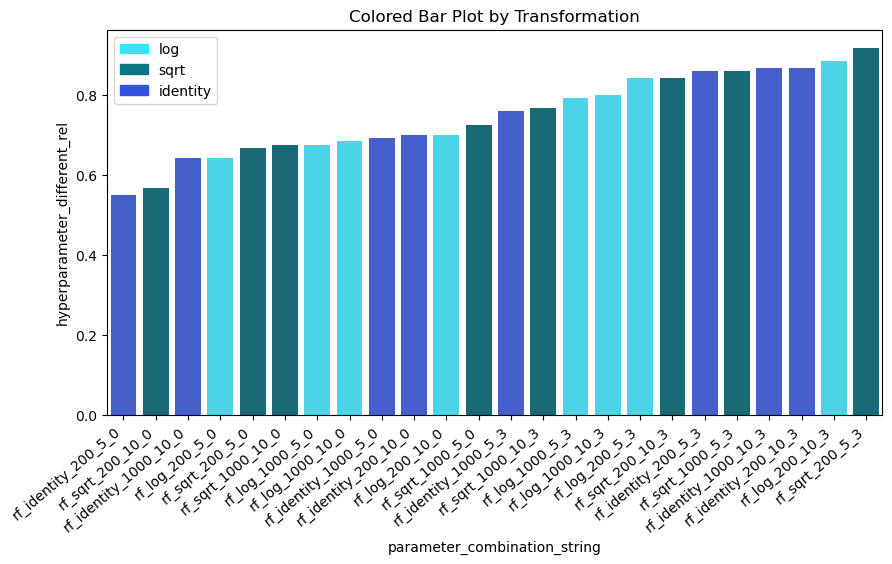

In [34]:
def barplot_coloured_by_parameter(data, experimental_parameter, variable_y, title):
   colors , set_colours, legend_labels =  colours_scheme(data.sort_values(variable_y), experimental_parameter)
   
   plt.figure(figsize=(10, 5))
   ax = sns.barplot(x="parameter_combination_string", y=variable_y, data=df, order=data.sort_values(variable_y)["parameter_combination_string"], palette=colors)
   ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
   ax.set_title(title)
   
   # Add legend
   legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in  set_colours]
   ax.legend(legend_handles, legend_labels)
   
   plt.show()

# Assuming df is your DataFrame
barplot_coloured_by_parameter(df, 'param_transformation', 'hyperparameter_different_rel', 'Colored Bar Plot by Transformation')

## hyperparameter_different_rel

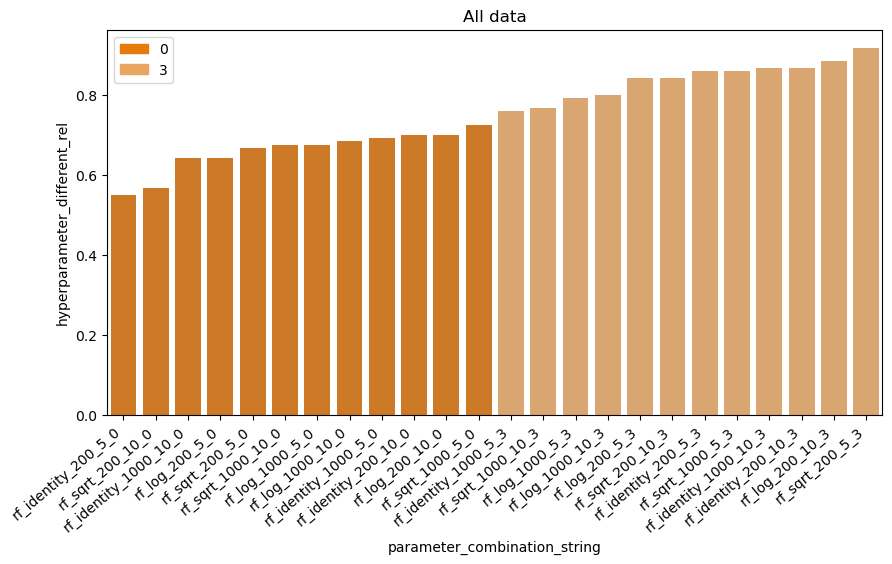

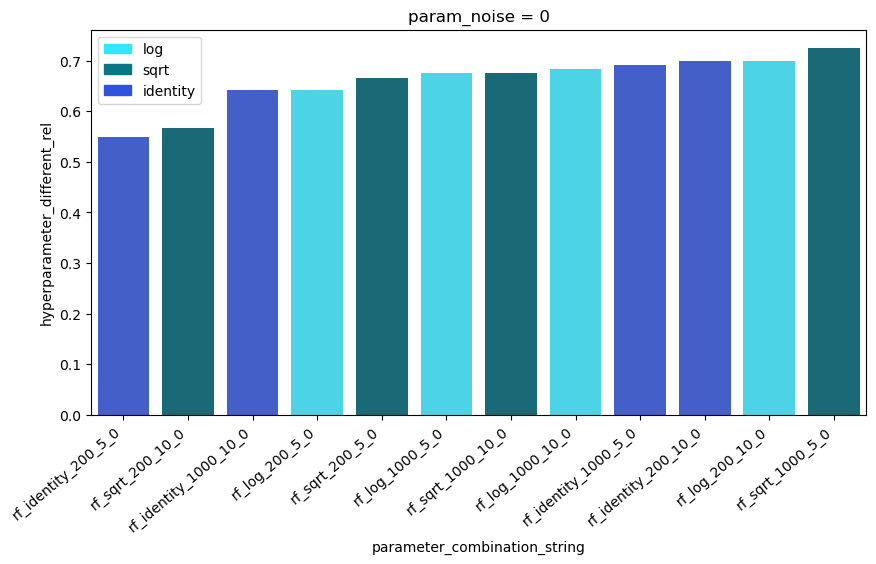

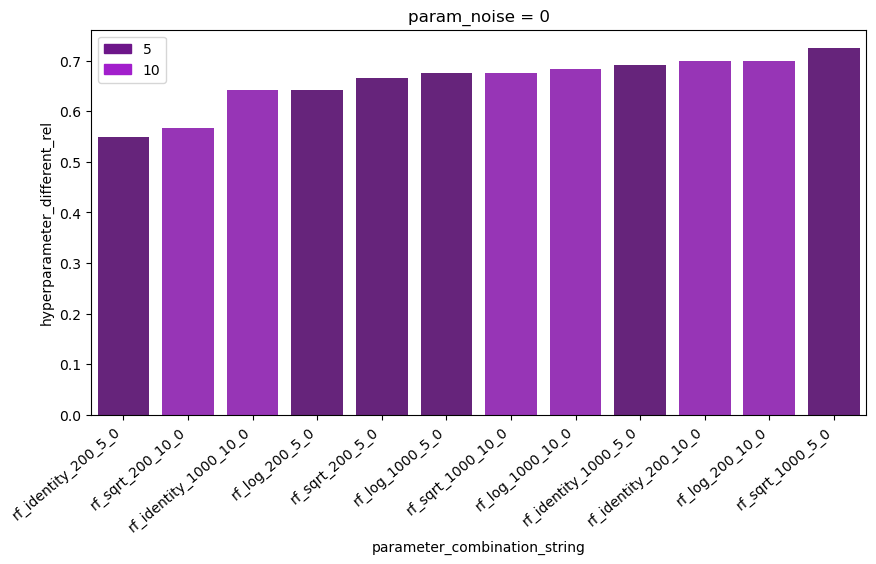

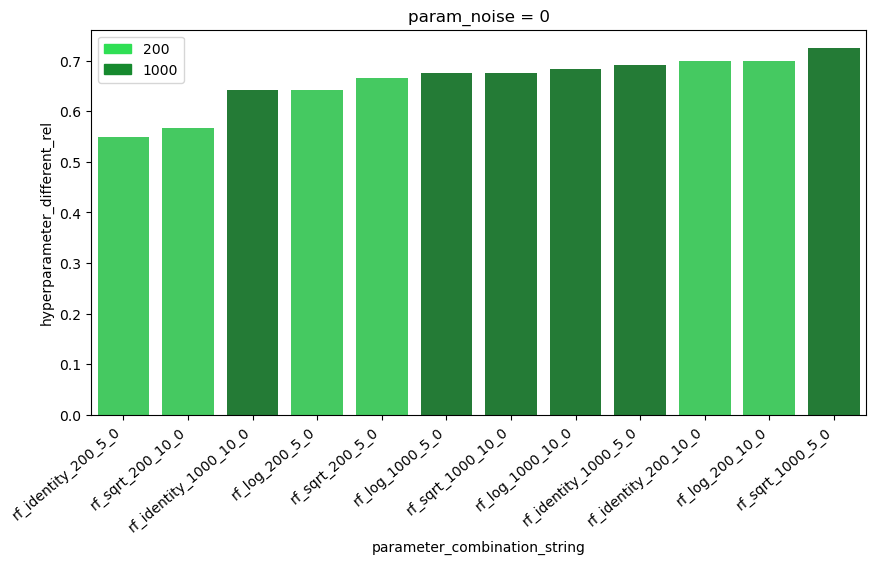

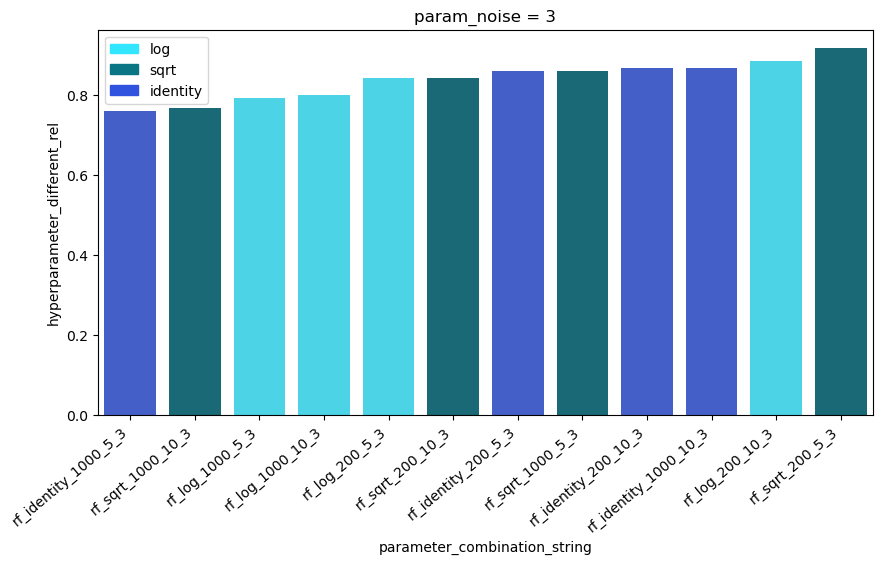

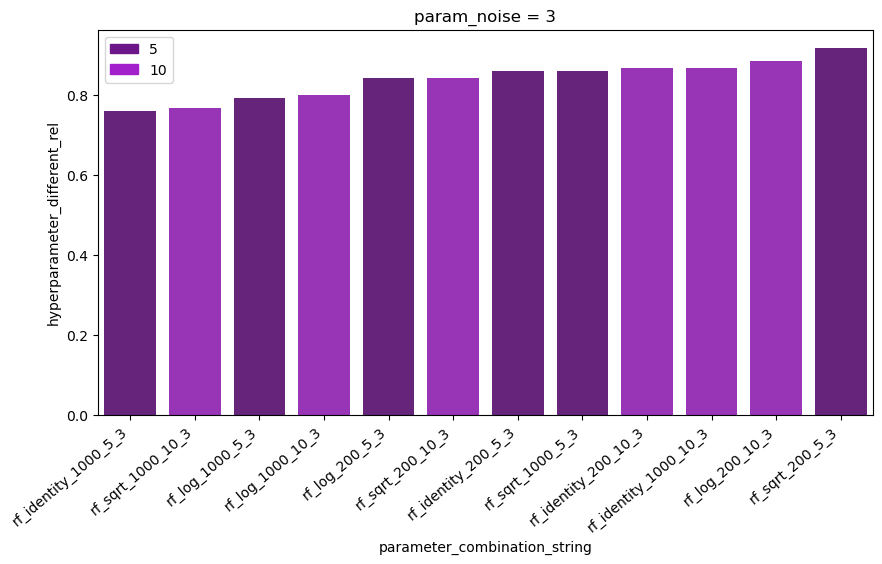

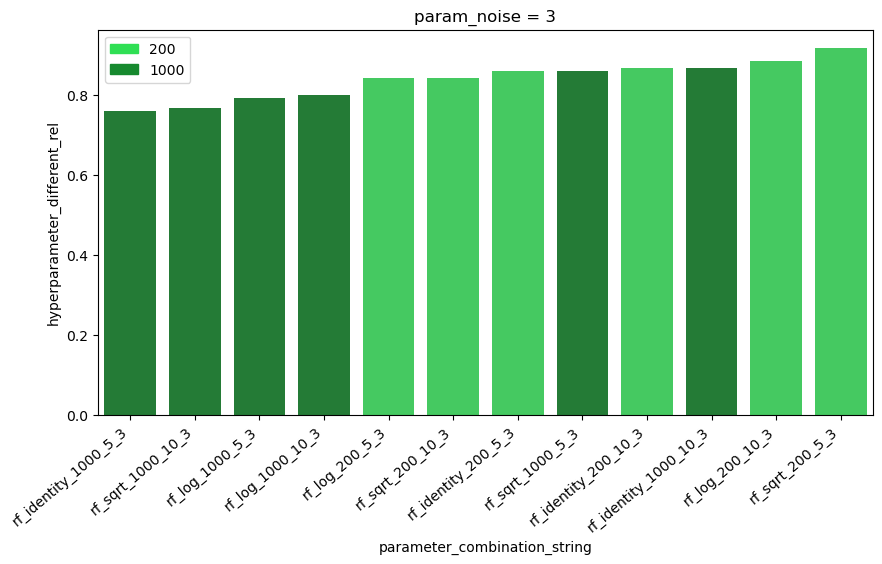

In [35]:
barplot_coloured_by_parameter(data = df, experimental_parameter = 'param_noise', variable_y = 'hyperparameter_different_rel', title = 'All data')
experimental_parameters = ['param_transformation', 'param_group_size', 'param_n_train']

df_noise_0 = df[df['param_noise'] == 0]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_0, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = 'param_noise = 0')

df_noise_3 = df[df['param_noise'] == 3]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_3, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = 'param_noise = 3')


## val_train_descriptives_intersection_area_mean_diff

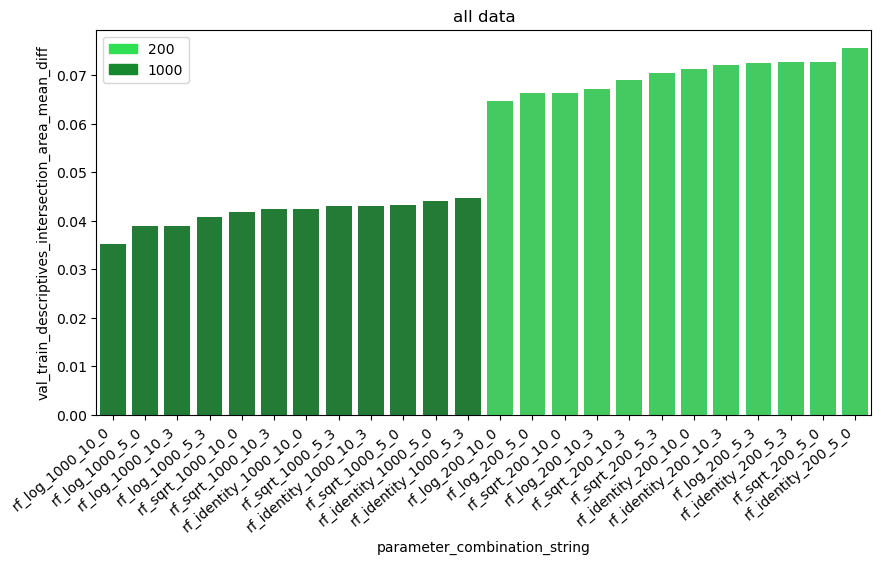

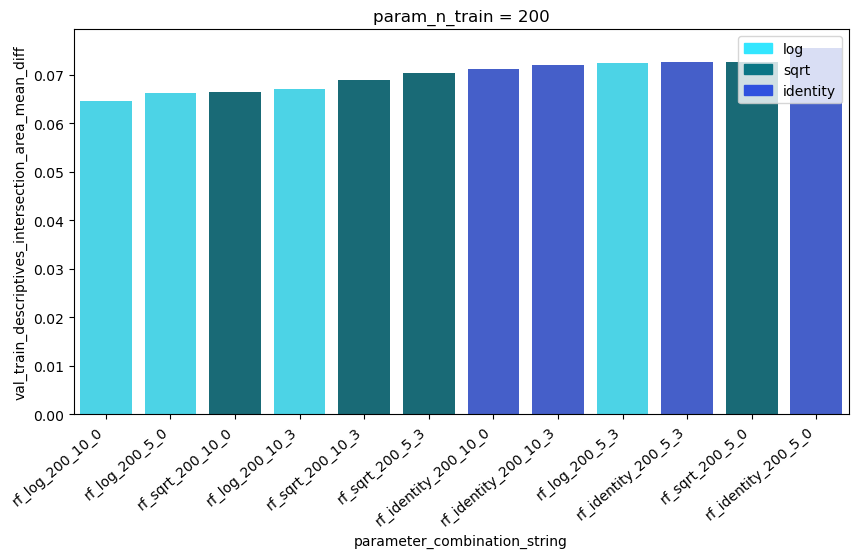

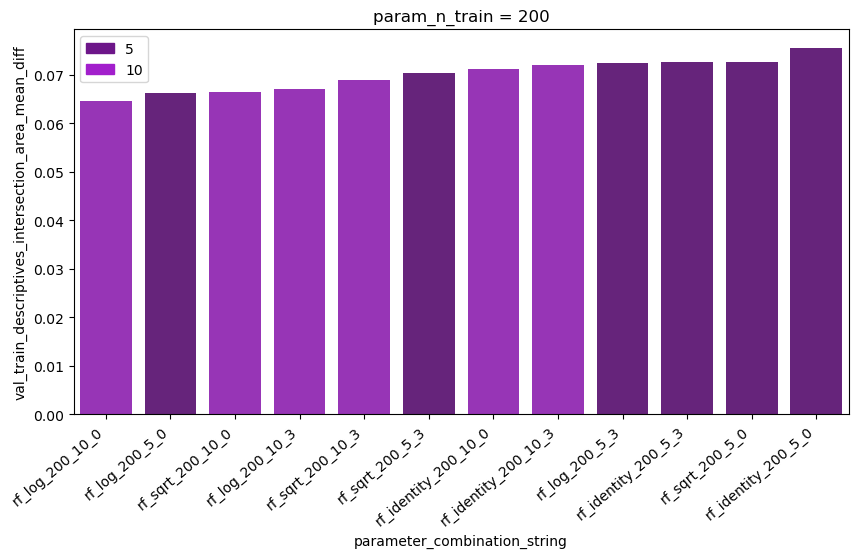

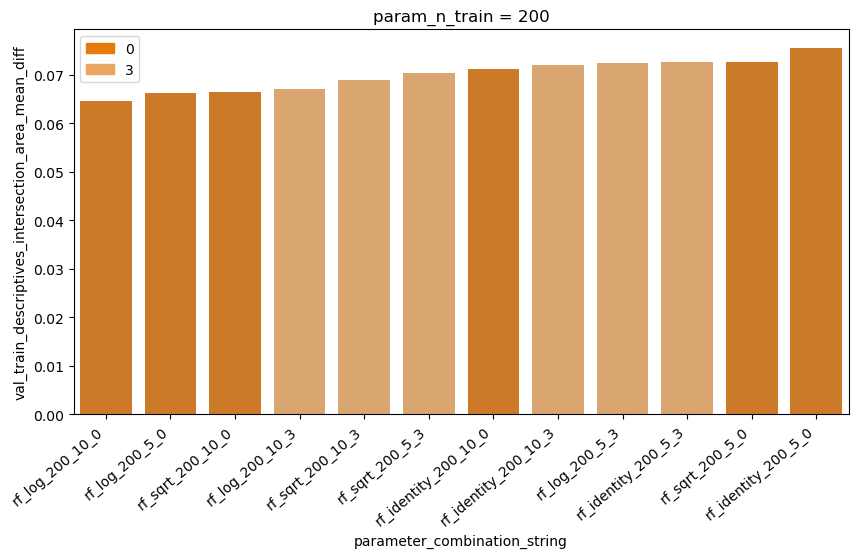

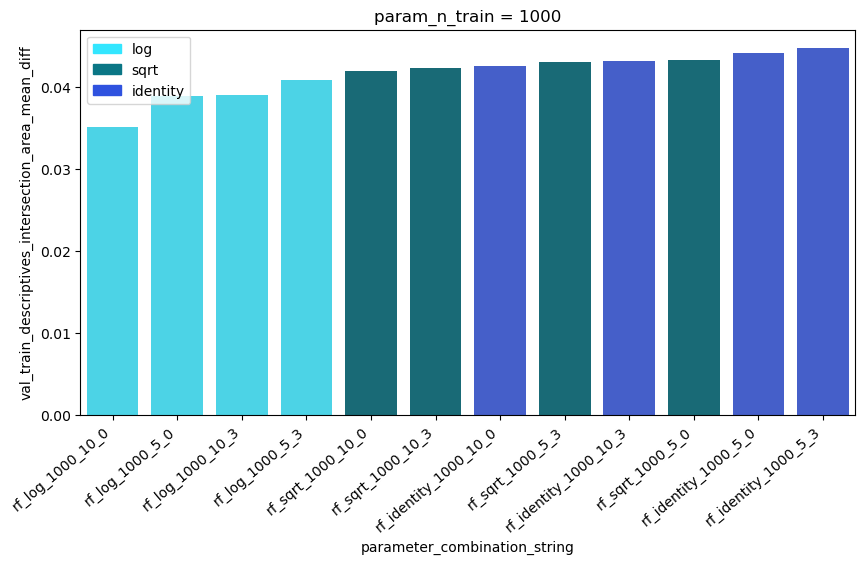

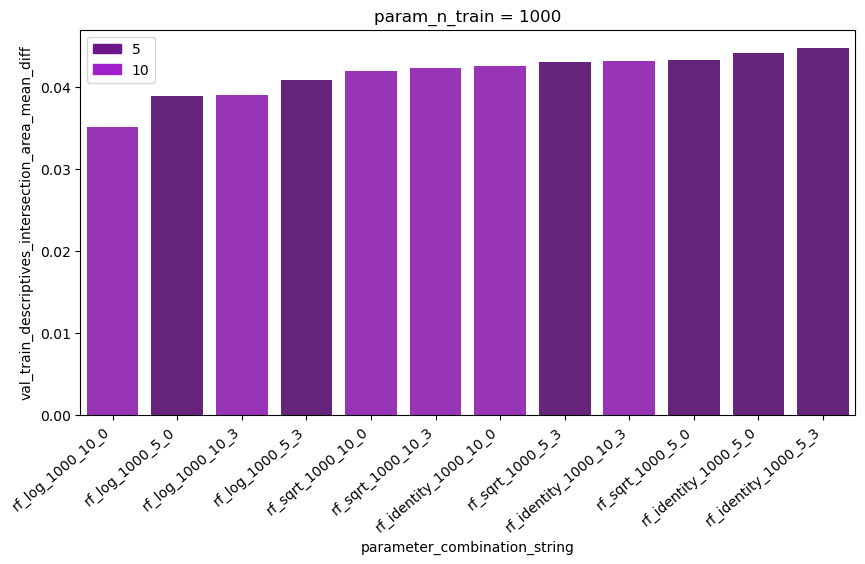

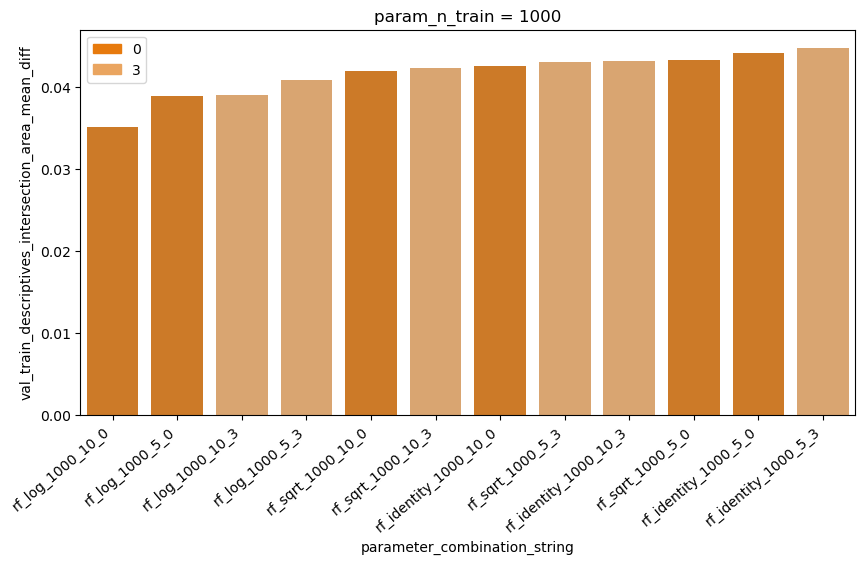

In [36]:
barplot_coloured_by_parameter(data = df, experimental_parameter = 'param_n_train', variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'all data')
experimental_parameters = ['param_transformation', 'param_group_size', 'param_noise']

df_noise_200 = df[df['param_n_train'] == 200]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_200, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 200')

df_noise_1000 = df[df['param_n_train'] == 1000]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_1000, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 1000')


## RandomSearch_Mean_Val_MSE_diff

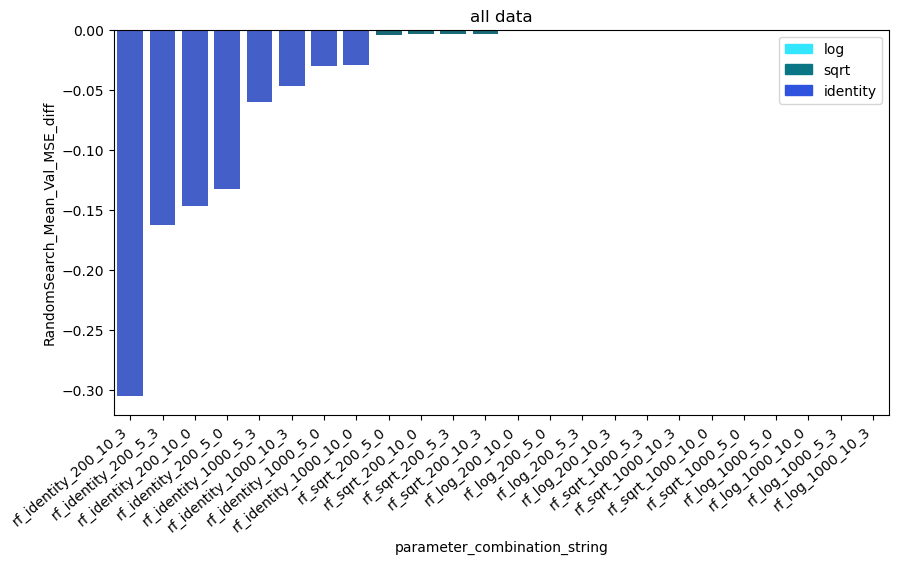

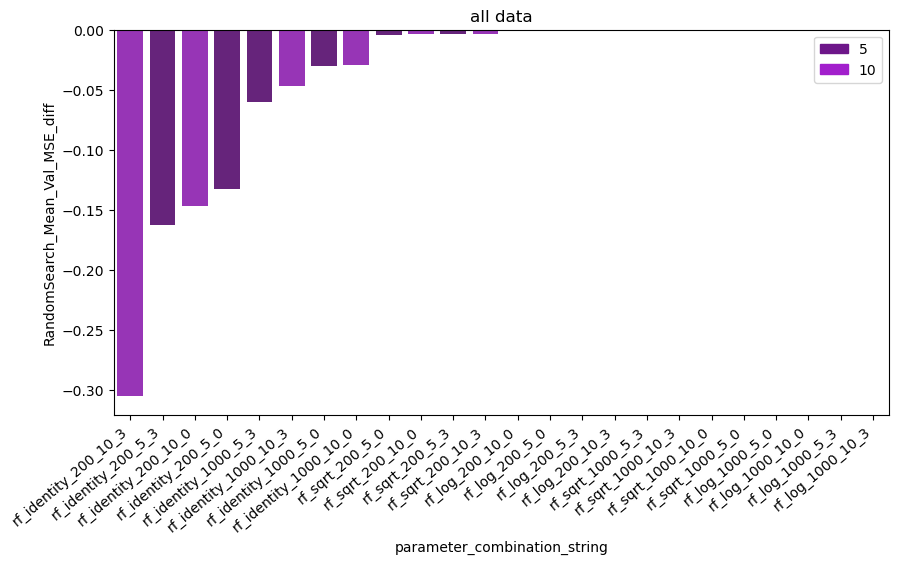

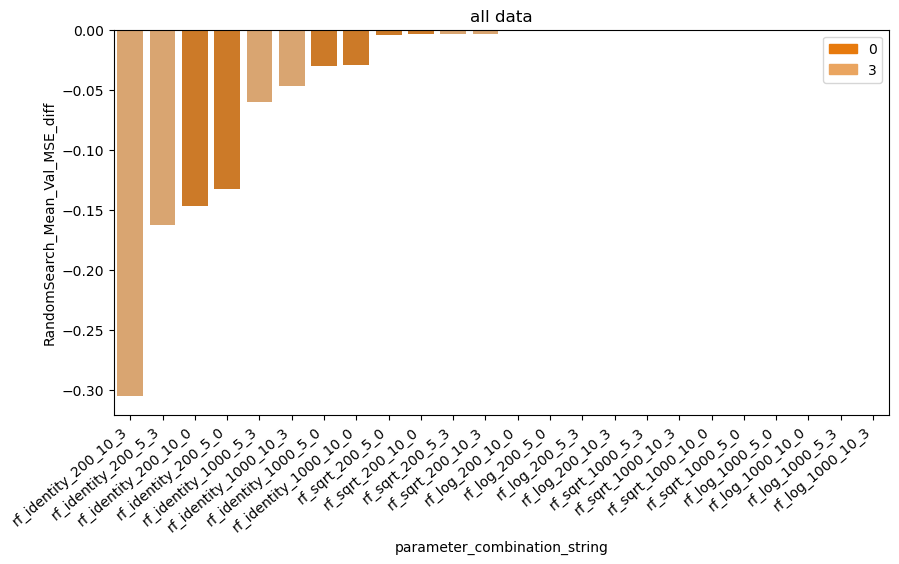

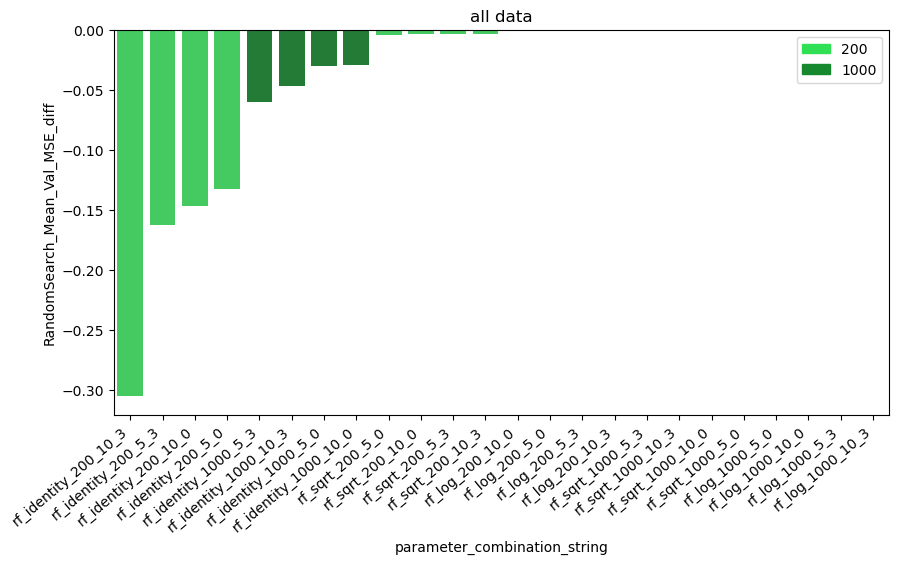

In [37]:
experimental_parameters = ['param_transformation', 'param_group_size', 'param_noise', 'param_n_train']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'all data')


In [38]:
'''
experimental_parameters = ['param_transformation', 'param_group_size', 'param_noise']
df_noise_200 = df[df['param_n_train'] == 200]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_200, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 200')

df_noise_1000 = df[df['param_n_train'] == 1000]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_1000, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 1000')
'''


"\nexperimental_parameters = ['param_transformation', 'param_group_size', 'param_noise']\ndf_noise_200 = df[df['param_n_train'] == 200]\nfor experimental_parameter in experimental_parameters:\n   barplot_coloured_by_parameter(data = df_noise_200, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 200')\n\ndf_noise_1000 = df[df['param_n_train'] == 1000]\nfor experimental_parameter in experimental_parameters:\n   barplot_coloured_by_parameter(data = df_noise_1000, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'param_n_train = 1000')\n"